<a href="https://colab.research.google.com/github/kmayutrisna/SA_IMDB/blob/main/Bert_CNN_Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 79.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.9 MB/s eta 0:00:00


In [ ]:
#DATA PREPARATION
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, GlobalMaxPooling1D, Embedding, MaxPooling1D

In [ ]:
#Get the dataset from gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Display top of data
data =pd.read_csv("drive/My Drive/data/train_amazon.csv")
data.head()

,text,label
0,Stuning even for the non-gamer: This sound tra...,1
1,The best soundtrack ever to anything.: I'm rea...,1
2,Amazing!: This soundtrack is my favorite music...,1
3,Excellent Soundtrack: I truly like this soundt...,1
4,"Remember, Pull Your Jaw Off The Floor After He...",1


In [ ]:
#Display top of data
data_test =pd.read_csv("drive/My Drive/data/test_amazon.csv")
data.head()

,text,label
0,Stuning even for the non-gamer: This sound tra...,1
1,The best soundtrack ever to anything.: I'm rea...,1
2,Amazing!: This soundtrack is my favorite music...,1
3,Excellent Soundtrack: I truly like this soundt...,1
4,"Remember, Pull Your Jaw Off The Floor After He...",1


In [ ]:
X_train = data['text'].values
y_train = data['label'].values
X_test = data_test['text'].values
y_test = data_test['label'].values

In [ ]:
# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# Define the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [ ]:
# Tokenize the texts and pad the sequences
train_encodings = tokenizer.batch_encode_plus(
    X_train.tolist(),
    truncation=True,
    padding=True,
    return_token_type_ids=False,
    max_length=512
)


test_encodings = tokenizer.batch_encode_plus(
    X_test.tolist(),
    truncation=True,
    padding=True,
    return_token_type_ids=False,
    max_length=512
)

In [ ]:
# Convert the tokenized inputs to numpy arrays
train_inputs = np.array(train_encodings['input_ids'])
train_labels = np.array(y_train)
test_inputs = np.array(test_encodings['input_ids'])
test_labels = np.array(y_test)

In [ ]:
# Pad the sequences
train_inputs = pad_sequences(train_inputs, maxlen=512, padding='post')
test_inputs = pad_sequences(test_inputs, maxlen=512, padding='post')

In [ ]:
model = Sequential()
model.add(Embedding(30522, 100, input_length=512))
model.add(Conv1D(128, 5, activation='relu'))
#model.add(MaxPooling1D(5))
#model.add(Conv1D(128, 5, activation='relu'))
#model.add(MaxPooling1D(5))
#model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
num_epochs = 5
batch_size = 16

# Lists to store accuracy values
train_acc_values = []
test_acc_values = []

In [ ]:

# Train the model and track accuracy
for epoch in range(num_epochs):
    history = model.fit(train_inputs, y_train, epochs=1, batch_size=batch_size, validation_data=(test_inputs, y_test))

    # Extract accuracy values from history
    train_acc = history.history['accuracy'][0]
    test_acc = history.history['val_accuracy'][0]

    # Append accuracy values to the lists
    train_acc_values.append(train_acc)
    test_acc_values.append(test_acc)

2250/2250 [==============================] - 247s 110ms/step - loss: 0.0195 - accuracy: 0.9939 - val_loss: 0.3940 - val_accuracy: 0.9047


In [ ]:
# Evaluate the model on the test dataset
predictions = model.predict(test_inputs)
y_pred = np.argmax(predictions, axis=1)

125/125 [==============================] - 7s 59ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(test_labels, y_pred)
recall = recall_score(test_labels, y_pred)
accuracy = accuracy_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred)

In [ ]:
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test Accuracy:", accuracy)
print("Test F1 Score:", f1)

Test Precision: 0.8871866295264624
Test Recall: 0.9326500732064422
Test Accuracy: 0.90475
Test F1 Score: 0.9093504639543184


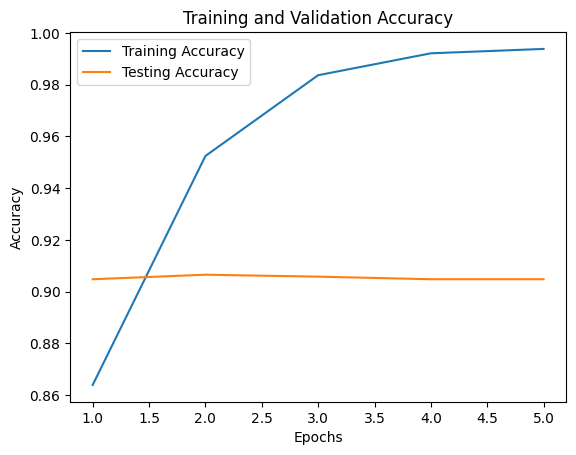

In [ ]:
# Plot the performance chart
import matplotlib.pyplot as plt
plt.plot(range(1, num_epochs+1), train_acc_values, label='Training Accuracy')
plt.plot(range(1, num_epochs+1), test_acc_values, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()